In [4]:
import pandas as pd
import numpy as np
import sqlite3
content = sqlite3.connect(r"D:\Documents\Data\archive\database.sqlite")
data = pd.read_sql_query(""" SELECT * FROM Reviews""",content)
print(data.shape)
data.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
#Cleaning of the duplicated
df = data.drop_duplicates(subset=['UserId','ProfileName','Time','Text'],keep='first',inplace=False)
df.shape
#********************Above is reading from the data and data cleansing************************

(393933, 10)

In [6]:
#Start of Building the dataset and for data preparation
data = df[['Score','Text']]
data['sentiments'] = data.Score.apply(lambda x: 0 if x in [1, 2] else 1)
data.head()
data.drop(data[data['Score']==3].index,inplace=True)
data.head()

C:\Users\27671\AppData\Local\Temp\ipykernel_11784\1573004200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiments'] = data.Score.apply(lambda x: 0 if x in [1, 2] else 1)
C:\Users\27671\AppData\Local\Temp\ipykernel_11784\1573004200.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['Score']==3].index,inplace=True)


,Score,Text,sentiments
0,5,I have bought several of the Vitality canned d...,1
1,1,Product arrived labeled as Jumbo Salted Peanut...,0
2,4,This is a confection that has been around a fe...,1
3,2,If you are looking for the secret ingredient i...,0
4,5,Great taffy at a great price. There was a wid...,1


In [48]:
#Cross Validation
split = round(len(data)*0.8)
train_reviews = data['Text'][:split]
train_label = data['sentiments'][:split]
test_reviews = data['Text'][split:]
test_label = data['sentiments'][split:]

In [49]:
"""
tokenization，也叫word segmentation,是一种操作，它按照特定需求，把文本切分成一个字符串序列(其元素一般称为token，或者叫词语)。
"""
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")

In [50]:
# Cross Validation //Storing the Records in an array
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for row in train_reviews:
    training_sentences.append(str(row))
for row in train_label:
    training_labels.append(str(row))
for row in test_reviews:
    testing_sentences.append(str(row))
for row in test_label:
    testing_labels.append(str(row))

In [51]:
"""

"""

# <OOV> is Out of Vocabulary total dict length will be 80000
tokenizer = Tokenizer(num_words=80000,oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences) #token to the array
word_index =tokenizer.word_index# word_index is a dict later methods will be referred to this dict

In [52]:
#padding the length in order to make it a unity form.
sequences = tokenizer.texts_to_sequences(training_sentences) # change the sequence to a set of the
padded =pad_sequences(sequences,maxlen=100,truncating='post',padding='post')
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences,maxlen=100,truncating='post',padding='post')

In [99]:
#1, Word Embedding (same meaning reduction of dimension )2. Golbal average layer, prevent over fitting (取均值) 3,dense layer 16 units relu 4, output layer
model = keras.Sequential([keras.layers.Embedding(80000,9,input_length=100), # 9 - deminsion vector
                         keras.layers.GlobalAvgPool1D(),# for getting the average of the word with the same meaning
                         keras.layers.Dense(6,activation='relu'), # activation fucnction
                         keras.layers.Dense(1,activation='sigmoid')])# smooth function
#Embedding Layer实现数据的 -> Polling Layer

In [100]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 9)            720000    
                                                                 
 global_average_pooling1d_5   (None, 9)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_10 (Dense)            (None, 6)                 60        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 720,067
Trainable params: 720,067
Non-trainable params: 0
_________________________________________________________________


In [101]:
training_labels_final = np.array(training_labels).astype(int)
testing_labels_final = np.array(testing_labels).astype(int)

In [103]:
num_epochs = 20
history = model.fit(padded, training_labels_final,batch_size=32, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
9105/9105 [==============================] - 48s 5ms/step - loss: 0.1855 - accuracy: 0.9276 - val_loss: 0.1865 - val_accuracy: 0.9265

<Figure size 432x288 with 0 Axes>

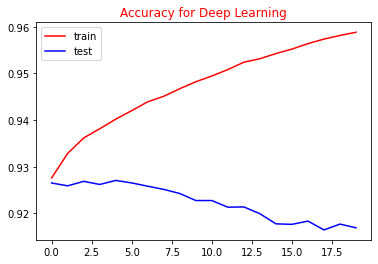

<Figure size 432x288 with 0 Axes>

In [108]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs,acc,'r')
plt.plot(epochs,val_acc,'b')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Accuracy for Deep Learning',c='r')
plt.figure()